# H1B Time Series Analysis and Forecasting<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\supri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data = pd.read_csv("C:\\Users\\supri\\OneDrive\\Desktop\\DAEN 3rd SEM\\AIT 664\\H1B_data.csv", index_col=False)

### Data Cleaning

In [4]:
data.shape

(621486, 12)

In [5]:
data.dtypes

Line by line                    int64
Fiscal Year                     int64
Employer (Petitioner) Name     object
Tax ID                        float64
Industry (NAICS) Code          object
Petitioner City                object
Petitioner State               object
Petitioner Zip Code           float64
Initial Approval                int64
Initial Denial                  int64
Continuing Approval             int64
Continuing Denial               int64
dtype: object

In [6]:
# finding null values
null_values = data.isnull().sum()
print(null_values)

Line by line                      0
Fiscal Year                       0
Employer (Petitioner) Name       52
Tax ID                         6403
Industry (NAICS) Code         63961
Petitioner City                   2
Petitioner State                 74
Petitioner Zip Code              89
Initial Approval                  0
Initial Denial                    0
Continuing Approval               0
Continuing Denial                 0
dtype: int64


In [7]:
data.rename(columns={'Line by line': 'S.no'}, inplace=True)

In [8]:
# Dropping Columns having huge missing data
data = data.drop(columns=['Industry (NAICS) Code', 'Tax ID'])

In [9]:
# Dropping Rows having low missing data
data = data.dropna()

### Data Manipulation

In [10]:
# Cleaning the text data
data['Employer (Petitioner) Name'] = data['Employer (Petitioner) Name'].astype(str)

# Defining a function to tokenize and clean the text in the 'Employer (Petitioner) Name' column
def clean_and_tokenize(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    replacement_dict = {
        'LIMITED': 'LTD',
        'SVCS' : 'SERVICES',
        'CORP' : 'CORPORATION',
        'SOLNS' : 'SOLUTIONS',
        'TECHNOLOGY' : 'TECH',
        'AMAZON.COM' : 'AMAZON'
        
    }
    
    # Replacing tokens using the replacement dictionary
    cleaned_tokens = [replacement_dict.get(token, token) for token in tokens]
    
    # Removing punctuation
    cleaned_tokens = [re.sub(r'[^\w\s]', '', token) for token in cleaned_tokens]
    
    # Removing white spaces
    cleaned_tokens = [re.sub(r'\s+', '', token) for token in cleaned_tokens]
    
    # Words to remove
    tokens_to_remove = ["LLC", "INC", "COM"]

    # Removing the specified words from the list
    cleaned_tokens = [token for token in cleaned_tokens if token not in tokens_to_remove]
  
    # Joining the cleaned tokens back into a single string
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text

In [11]:
# Applying the clean_and_tokenize function to the 'Employer (Petitioner) Name' column
data['Employer (Petitioner) Name'] = data['Employer (Petitioner) Name'].apply(clean_and_tokenize)

In [12]:
data.reset_index(drop=True, inplace=True)

In [13]:
data.head(10)

,S.no,Fiscal Year,Employer (Petitioner) Name,Petitioner City,Petitioner State,Petitioner Zip Code,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial
0,4,2023,1 800 CONTACTS,DRAPER,UT,84020.0,0,0,2,0
1,5,2023,1 800 FLOWERS,JERICHO,NY,11753.0,0,0,4,0
2,6,2023,1 ADVANCING EDUCATION,LOS ANGELES,CA,90057.0,0,0,1,0
3,7,2023,1 BETHESDA DRIVE OPERATING COMPANY DBA ELDERWO...,HORNELL,NY,14843.0,0,0,1,0
4,8,2023,1 HOTEL SOUTH BEACH,MIAMI BEACH,FL,33139.0,0,0,1,0
5,9,2023,1LIFE HEALTHCARE,SAN FRANCISCO,CA,94111.0,1,0,2,0
6,10,2023,1NTEGER DBA KHARON,SANTA MONICA,CA,90403.0,0,0,1,0
7,11,2023,1POINT3ACRES,BELLEVUE,WA,98005.0,0,0,1,0
8,12,2023,1POINT3ACRES,LAS VEGAS,NV,89102.0,0,0,1,0
9,13,2023,1RIVET INTERNATIONAL,RESTON,VA,20191.0,0,0,1,0


In [14]:
data.to_csv("datah1b.csv")

## <hr>Exploratory Data Analysis<hr>

### Top 20 Companies sponsoring H1B visas with Initial Approval

In [15]:
data_IA = data.groupby(['Employer (Petitioner) Name'])['Initial Approval'].sum().reset_index()

In [16]:
data_IA.sort_values(by = 'Initial Approval', ascending = False).reset_index(drop=True).head(20)

,Employer (Petitioner) Name,Initial Approval
0,TATA CONSULTANCY SERVICES LTD,34250
1,COGNIZANT TECH SOLUTIONS US CORPORATION,28709
2,INFOSYS LTD,28371
3,AMAZON SERVICES,19789
4,WIPRO LTD,16847
5,ACCENTURE LLP,16844
6,GOOGLE,13535
7,MICROSOFT CORPORATION,13217
8,TECH MAHINDRA AMERICAS,11097
9,HCL AMERICA,10752


#### 2022 Statistics

In [17]:
data_2022 = data[data['Fiscal Year'] == 2022].groupby(['Employer (Petitioner) Name'])['Initial Approval'].sum().reset_index()

In [18]:
data_2022.sort_values(by = 'Initial Approval', ascending = False).reset_index(drop=True).head(20)

,Employer (Petitioner) Name,Initial Approval
0,AMAZON SERVICES,4047
1,INFOSYS LTD,3130
2,TATA CONSULTANCY SERVICES LTD,2730
3,COGNIZANT TECH SOLUTIONS US CORPORATION,2305
4,GOOGLE,1578
5,META PLATFORMS,1314
6,IBM CORPORATION,1238
7,HCL AMERICA,1170
8,WIPRO LTD,1151
9,ACCENTURE LLP,1114


### Top 20 Cities with H1B sponsoring Companies

In [19]:
data_PC = data.groupby(['Petitioner City'])['Initial Approval'].sum().reset_index()

In [20]:
data_PC.sort_values(by = 'Initial Approval', ascending = False).reset_index(drop=True).head(20)

,Petitioner City,Initial Approval
0,NEW YORK,66973
1,CHICAGO,41937
2,ROCKVILLE,36177
3,SEATTLE,31586
4,COLLEGE STATION,26375
5,SAN FRANCISCO,26215
6,PLANO,24312
7,SAN JOSE,22186
8,HOUSTON,20113
9,BOSTON,19557


#### 2022 Statistics

In [21]:
data_2022 = data[data['Fiscal Year'] == 2022].groupby(['Petitioner City'])['Initial Approval'].sum().reset_index()

In [22]:
data_2022.sort_values(by = 'Initial Approval', ascending = False).reset_index(drop=True).head(20)

,Petitioner City,Initial Approval
0,NEW YORK,7039
1,ARLINGTON,4595
2,CHICAGO,4289
3,RICHARDSON,3527
4,ROCKVILLE,2937
5,COLLEGE STATION,2610
6,SAN FRANCISCO,2505
7,MOUNTAIN VIEW,2327
8,SAN JOSE,2147
9,BOSTON,1868


### Top 20 Companies sponsoring H1B visas with Continuing Approval

In [23]:
data_CA = data.groupby(['Employer (Petitioner) Name'])['Continuing Approval'].sum().reset_index()

In [24]:
data_CA.sort_values(by = 'Continuing Approval', ascending = False).reset_index(drop=True).head(20)

,Employer (Petitioner) Name,Continuing Approval
0,COGNIZANT TECH SOLUTIONS US CORPORATION,110237
1,INFOSYS LTD,73815
2,TATA CONSULTANCY SERVICES LTD,71195
3,MICROSOFT CORPORATION,38182
4,AMAZON SERVICES,37635
5,WIPRO LTD,36707
6,DELOITTE CONSULTING LLP,33947
7,GOOGLE,32151
8,ACCENTURE LLP,27551
9,APPLE,23811


In [25]:
data['Overall Approval'] = data['Initial Approval'] + data['Continuing Approval']

In [26]:
data.head()

,S.no,Fiscal Year,Employer (Petitioner) Name,Petitioner City,Petitioner State,Petitioner Zip Code,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial,Overall Approval
0,4,2023,1 800 CONTACTS,DRAPER,UT,84020.0,0,0,2,0,2
1,5,2023,1 800 FLOWERS,JERICHO,NY,11753.0,0,0,4,0,4
2,6,2023,1 ADVANCING EDUCATION,LOS ANGELES,CA,90057.0,0,0,1,0,1
3,7,2023,1 BETHESDA DRIVE OPERATING COMPANY DBA ELDERWO...,HORNELL,NY,14843.0,0,0,1,0,1
4,8,2023,1 HOTEL SOUTH BEACH,MIAMI BEACH,FL,33139.0,0,0,1,0,1


### Top 20 Companies sponsoring H1B visas with Overall Approval

In [27]:
data_OA = data.groupby(['Employer (Petitioner) Name'])['Overall Approval'].sum().reset_index()

In [28]:
data_OA.sort_values(by = 'Overall Approval', ascending = False).reset_index(drop=True).head(20)

,Employer (Petitioner) Name,Overall Approval
0,COGNIZANT TECH SOLUTIONS US CORPORATION,138946
1,TATA CONSULTANCY SERVICES LTD,105445
2,INFOSYS LTD,102186
3,AMAZON SERVICES,57424
4,WIPRO LTD,53554
5,MICROSOFT CORPORATION,51399
6,GOOGLE,45686
7,ACCENTURE LLP,44395
8,DELOITTE CONSULTING LLP,41688
9,HCL AMERICA,32765


### Total Number of Petitions filed Yearly

In [29]:
data_FY = data.groupby(['Fiscal Year']).size().reset_index(name='Number of Petitions')

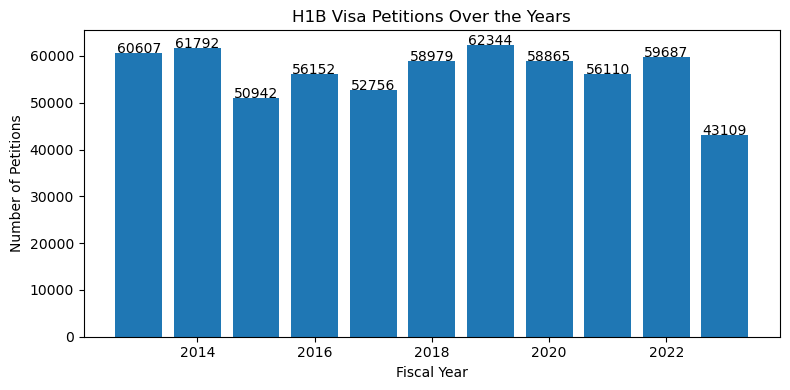

In [30]:
plt.figure(figsize=(8, 4))
ax = plt.gca()
plt.bar(data_FY['Fiscal Year'], data_FY['Number of Petitions'])
plt.xlabel('Fiscal Year')
plt.ylabel('Number of Petitions')
plt.title('H1B Visa Petitions Over the Years')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width / 2, y + height), ha='center')

plt.tight_layout()

plt.show()

### Time Series Analysis for top 20 Companies with H1B visas Initial Approval

In [31]:
# Calculate total initial approvals for each company over the years
company_IA = data[data['Fiscal Year'] != 2023].groupby(['Employer (Petitioner) Name', 'Fiscal Year'])['Initial Approval'].sum().reset_index()

In [32]:
top_20_companies = data_IA.sort_values(by = 'Initial Approval', ascending = False).reset_index(drop=True).head(20)

In [33]:
# Assuming you already have the top_20_companies variable
data_TS = company_IA[company_IA['Employer (Petitioner) Name'].isin(top_20_companies['Employer (Petitioner) Name'])]

In [34]:
data_TS.reset_index(drop=True)

,Employer (Petitioner) Name,Fiscal Year,Initial Approval
0,ACCENTURE LLP,2013,3378
1,ACCENTURE LLP,2014,2532
2,ACCENTURE LLP,2015,3442
3,ACCENTURE LLP,2016,1855
4,ACCENTURE LLP,2017,955
...,...,...,...
189,WIPRO LTD,2018,276
190,WIPRO LTD,2019,609
191,WIPRO LTD,2020,1004
192,WIPRO LTD,2021,1382


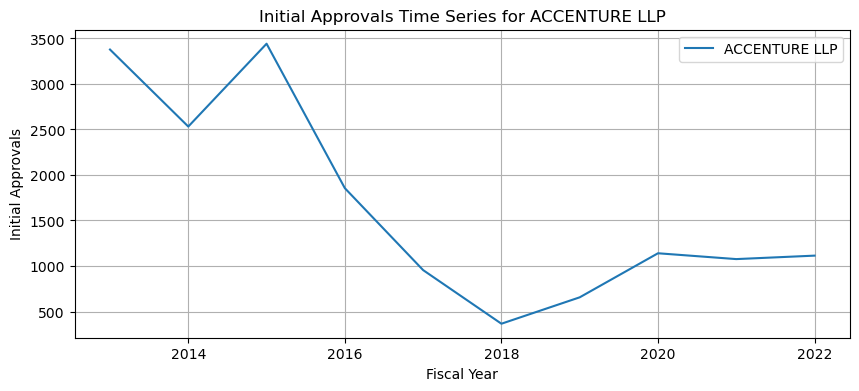

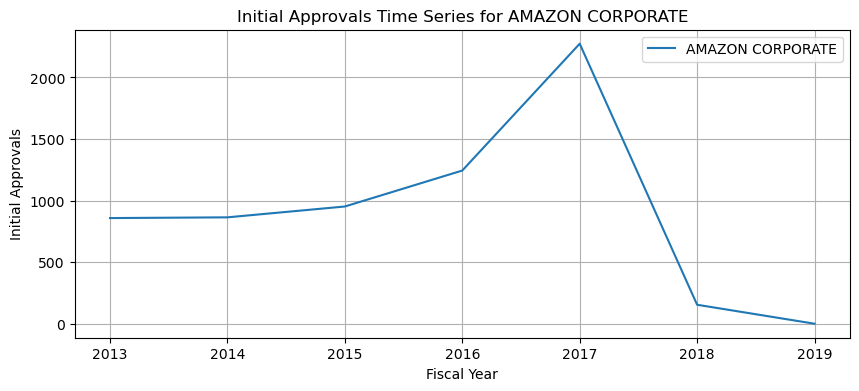

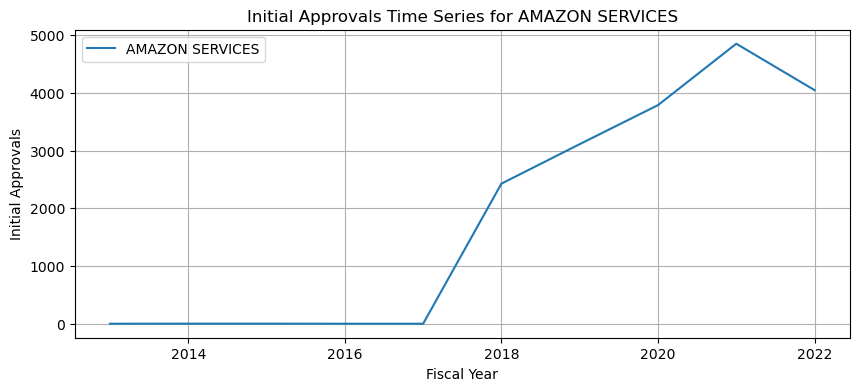

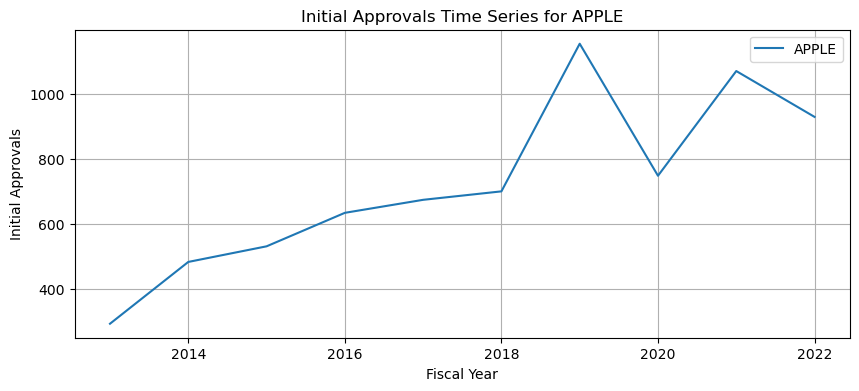

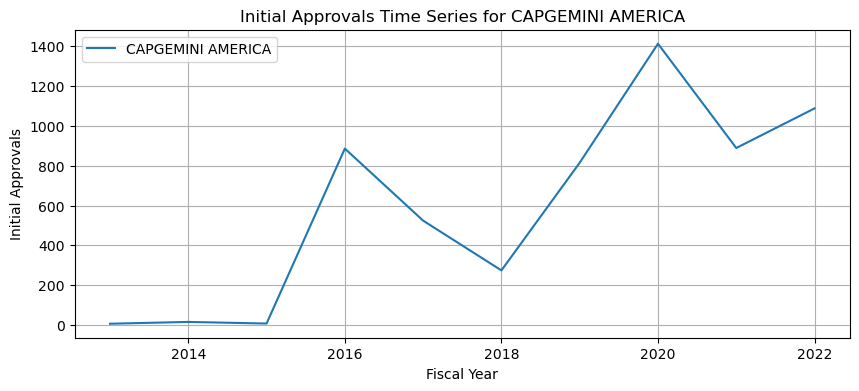

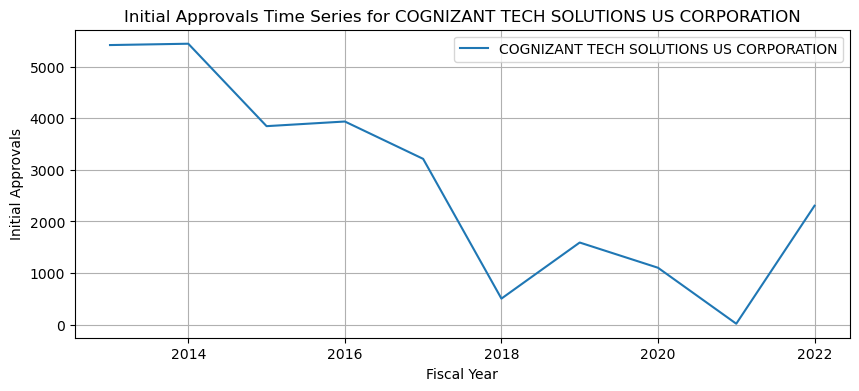

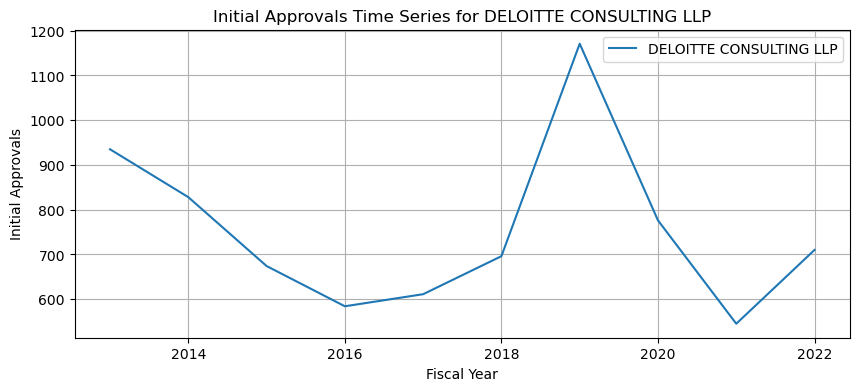

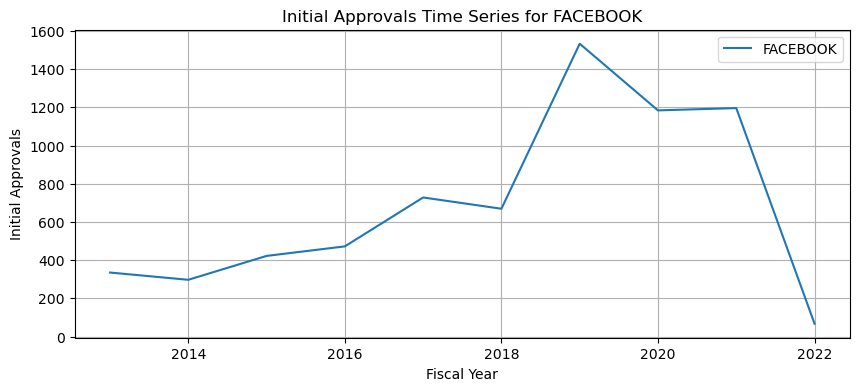

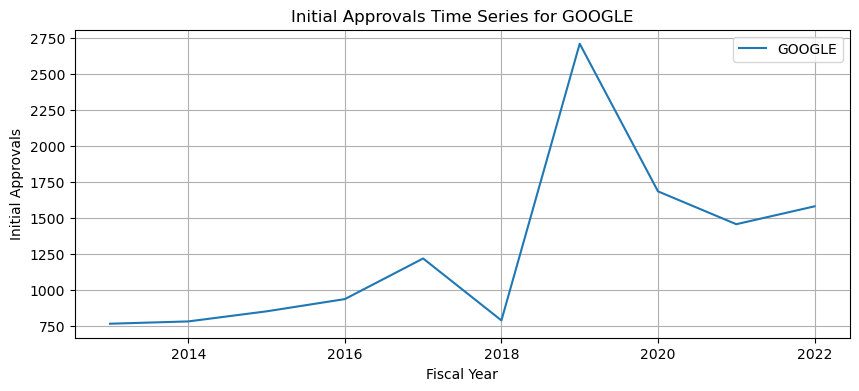

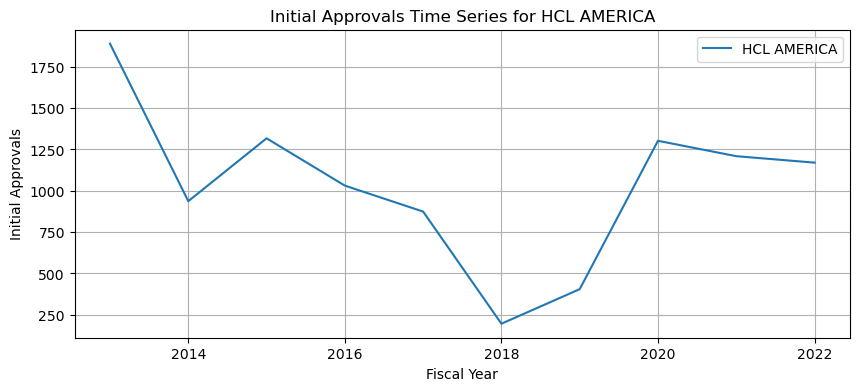

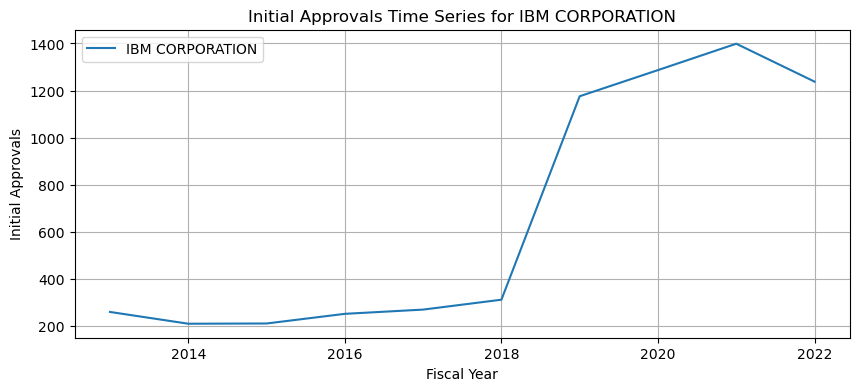

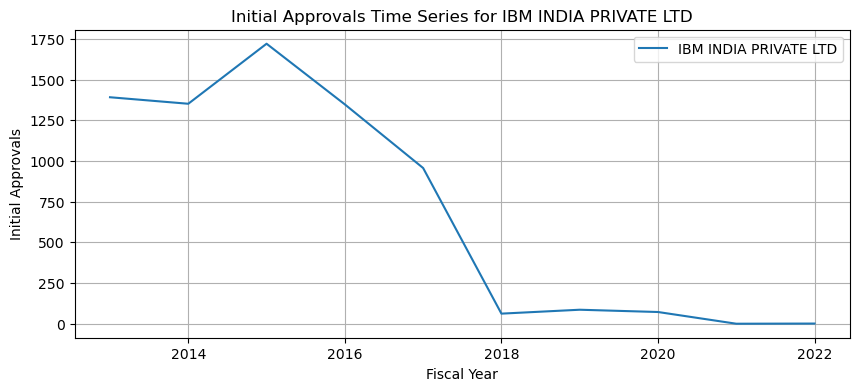

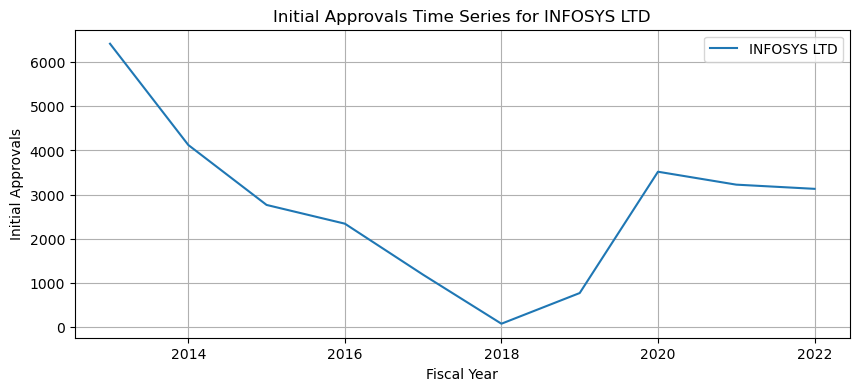

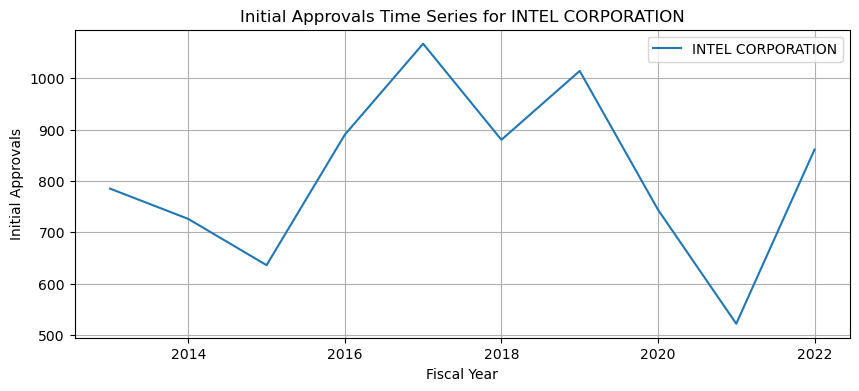

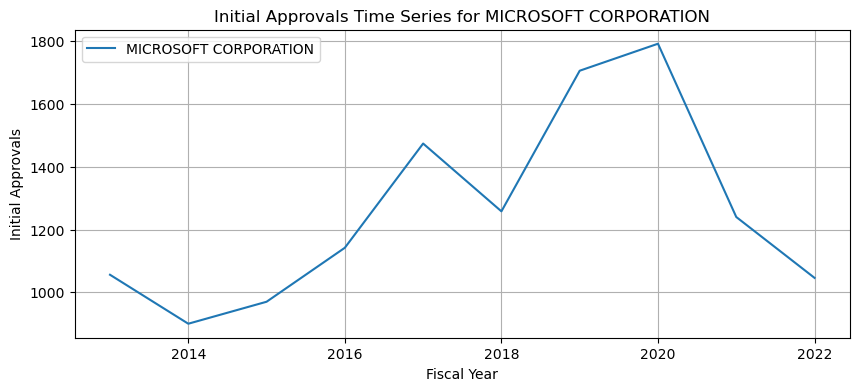

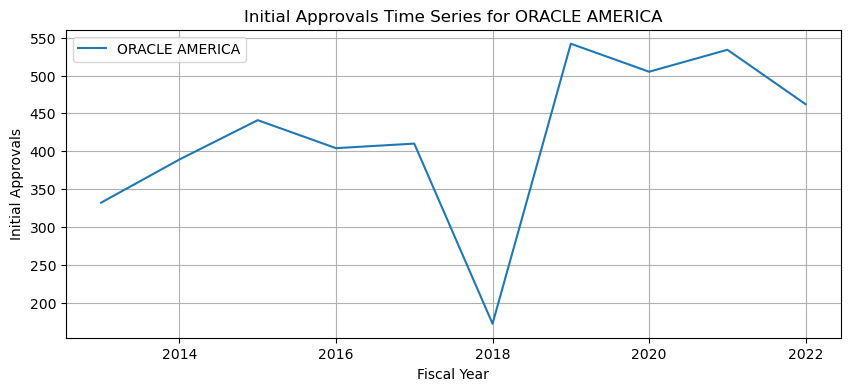

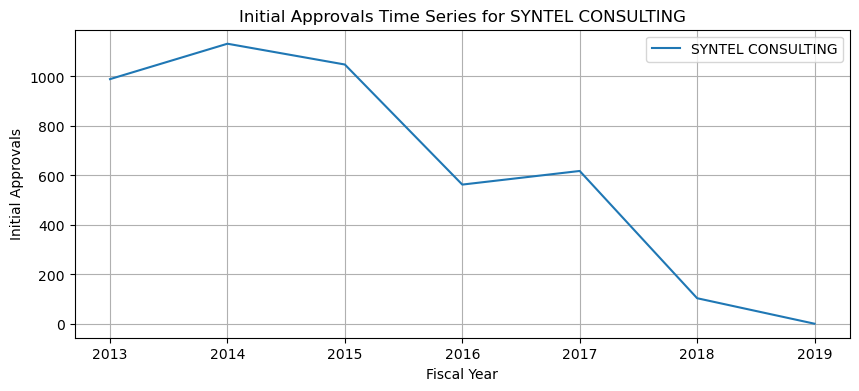

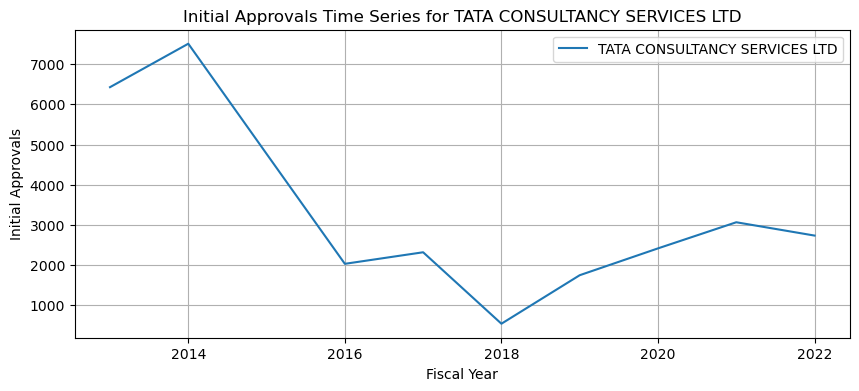

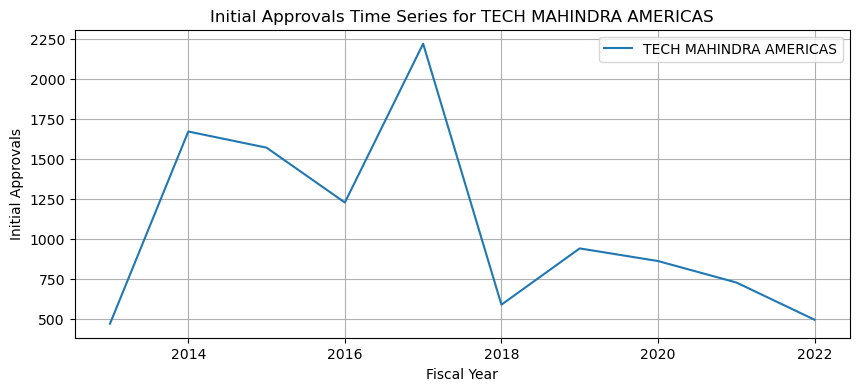

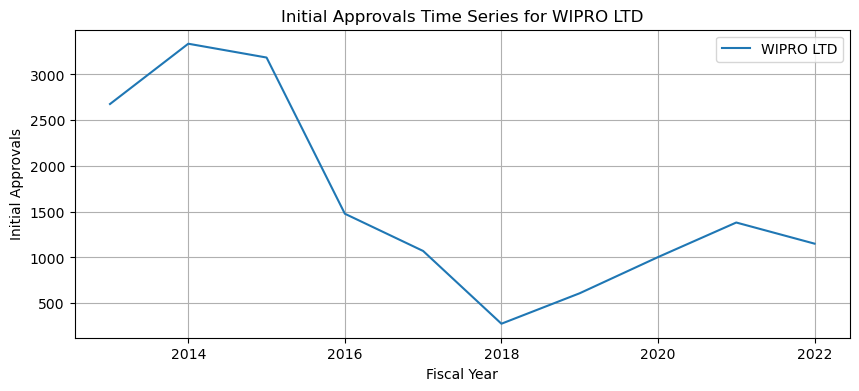

In [35]:
for company_name, data in data_TS.groupby('Employer (Petitioner) Name'):
    plt.figure(figsize=(10, 4))
    plt.plot(data['Fiscal Year'], data['Initial Approval'], label=company_name)
    plt.xlabel('Fiscal Year')
    plt.ylabel('Initial Approvals')
    plt.title(f'Initial Approvals Time Series for {company_name}')
    plt.legend()
    plt.grid(True)

plt.show()

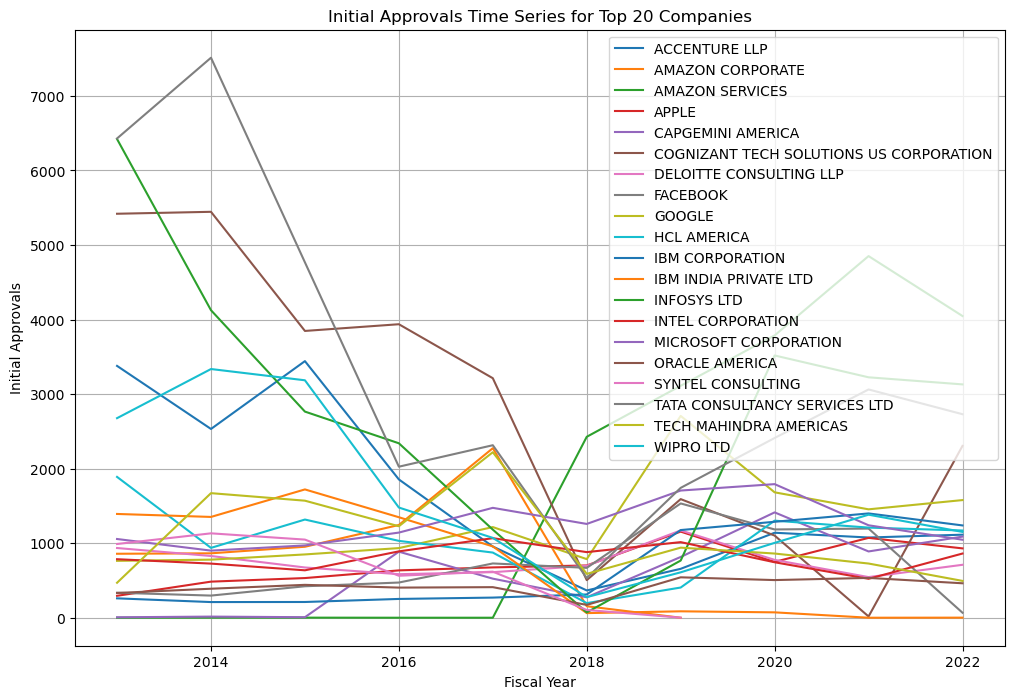

In [36]:
plt.figure(figsize=(12, 8))

for company_name, data in data_TS.groupby('Employer (Petitioner) Name'):
    plt.plot(data['Fiscal Year'], data['Initial Approval'], label=company_name)

plt.xlabel('Fiscal Year')
plt.ylabel('Initial Approvals')
plt.title('Initial Approvals Time Series for Top 20 Companies')
plt.legend()
plt.grid(True)

plt.show()

### Forecasting the Trends for the next 5 Years

C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


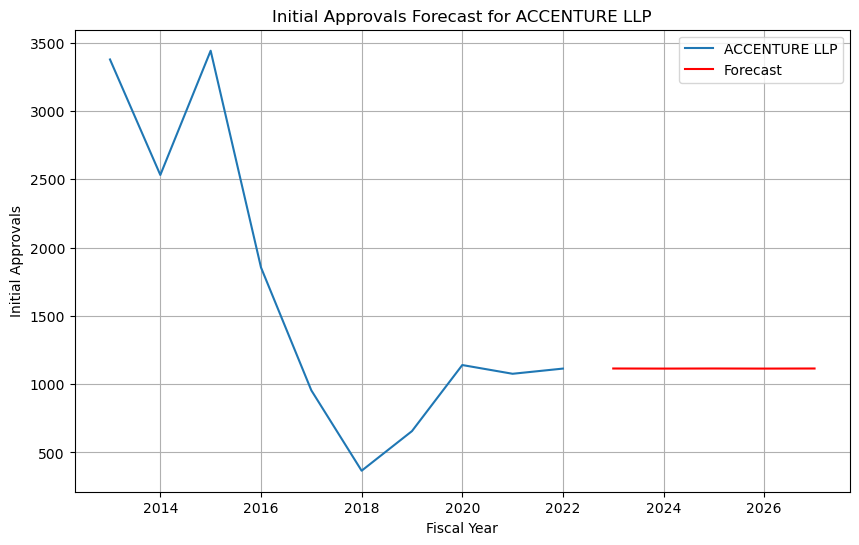

    Fiscal Year  Initial Approval Forecast
10         2023                1114.670499
11         2024                1114.000001
12         2025                1114.670498
13         2026                1114.000002
14         2027                1114.670498


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


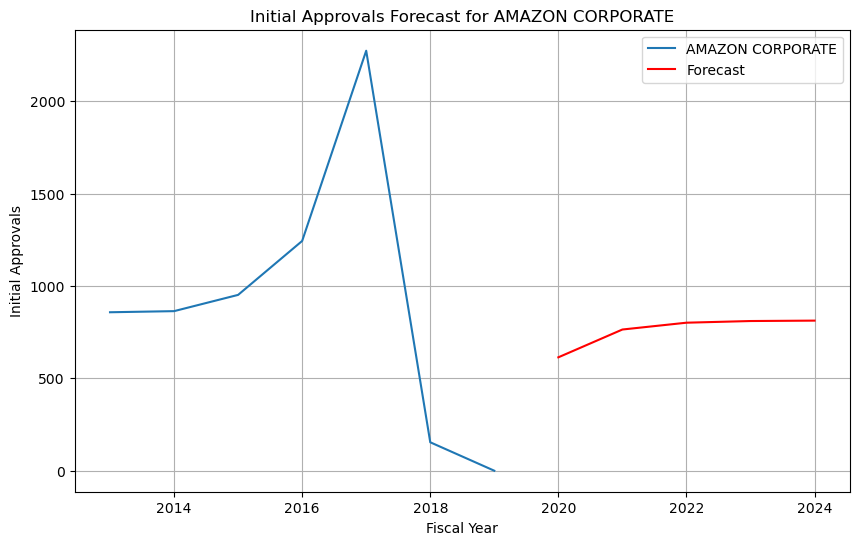

    Fiscal Year  Initial Approval Forecast
7          2020                 614.010040
8          2021                 764.531319
9          2022                 801.430805
10         2023                 810.476517
11         2024                 812.694025


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


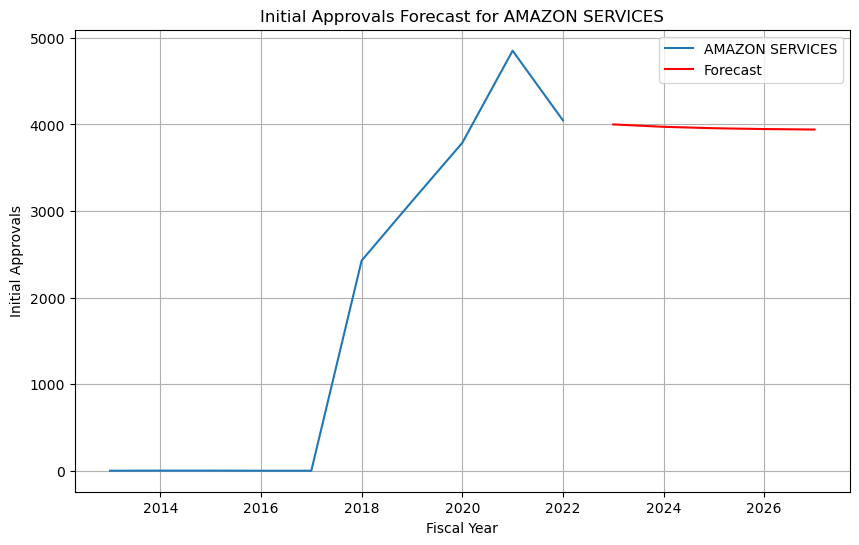

    Fiscal Year  Initial Approval Forecast
10         2023                3999.910955
11         2024                3972.187809
12         2025                3955.866119
13         2026                3946.256907
14         2027                3940.599592


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


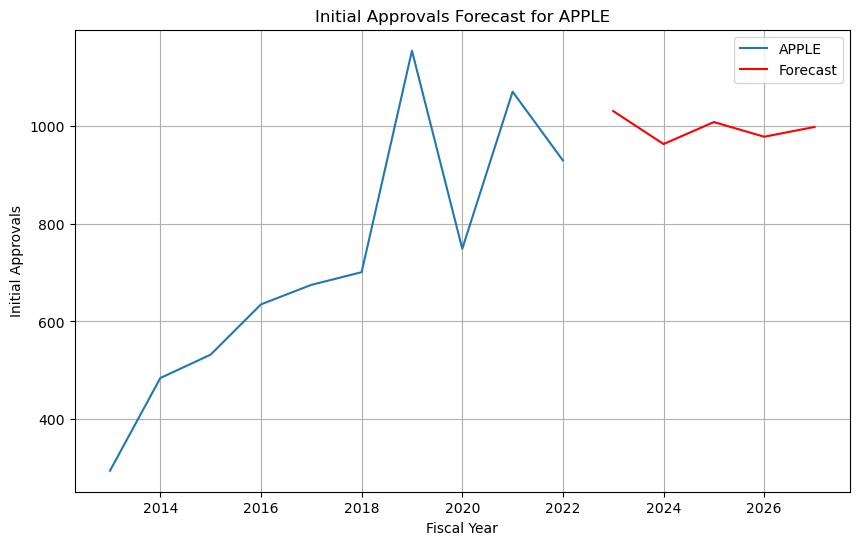

    Fiscal Year  Initial Approval Forecast
10         2023                1031.179694
11         2024                 963.651129
12         2025                1008.720519
13         2026                 978.640657
14         2027                 998.716325


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


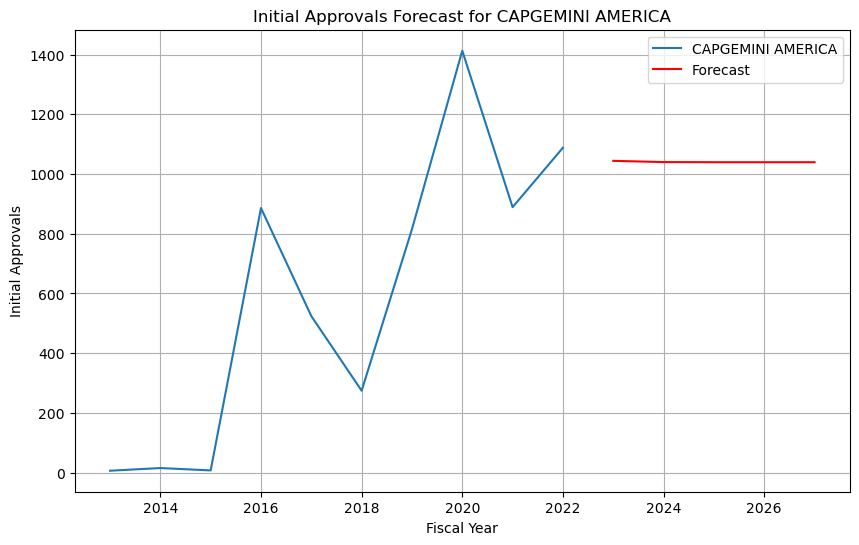

    Fiscal Year  Initial Approval Forecast
10         2023                1044.075532
11         2024                1039.959051
12         2025                1039.573266
13         2026                1039.537111
14         2027                1039.533723


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


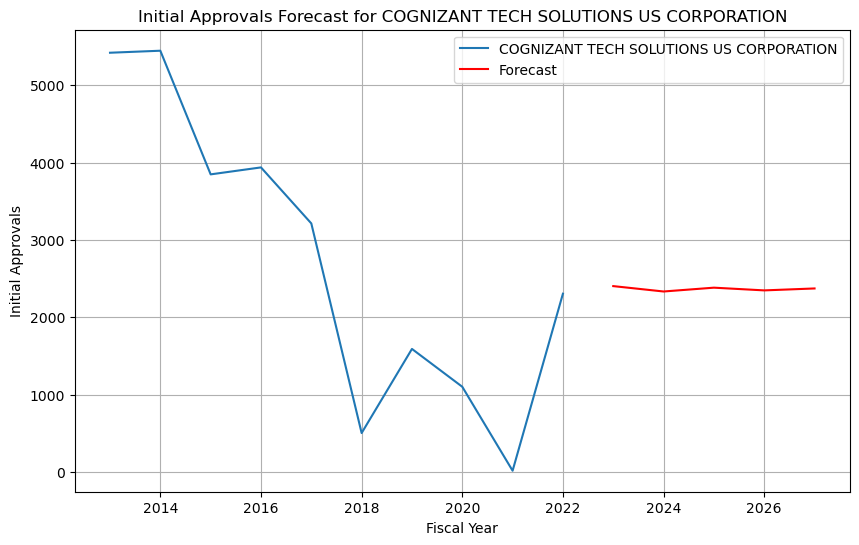

    Fiscal Year  Initial Approval Forecast
10         2023                2402.835284
11         2024                2333.273469
12         2025                2382.732580
13         2026                2347.566683
14         2027                2372.569969


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


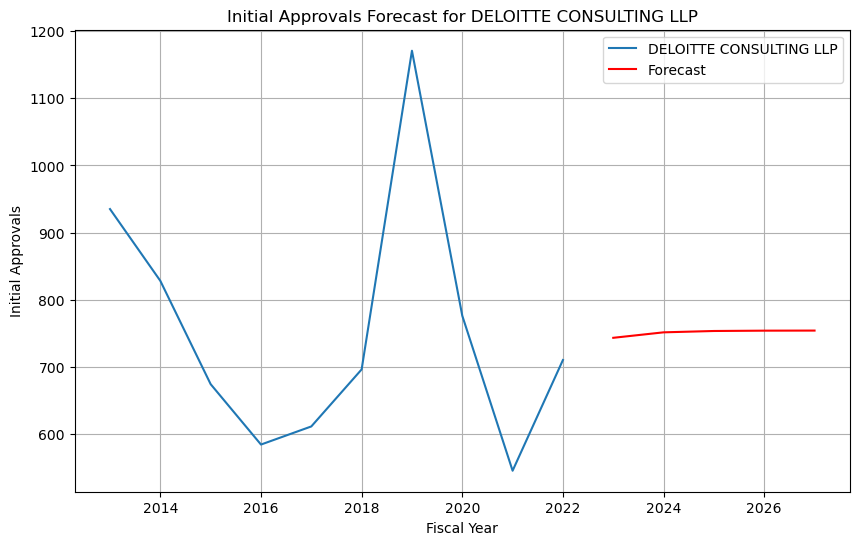

    Fiscal Year  Initial Approval Forecast
10         2023                 743.109931
11         2024                 751.258315
12         2025                 753.263640
13         2026                 753.757153
14         2027                 753.878607


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


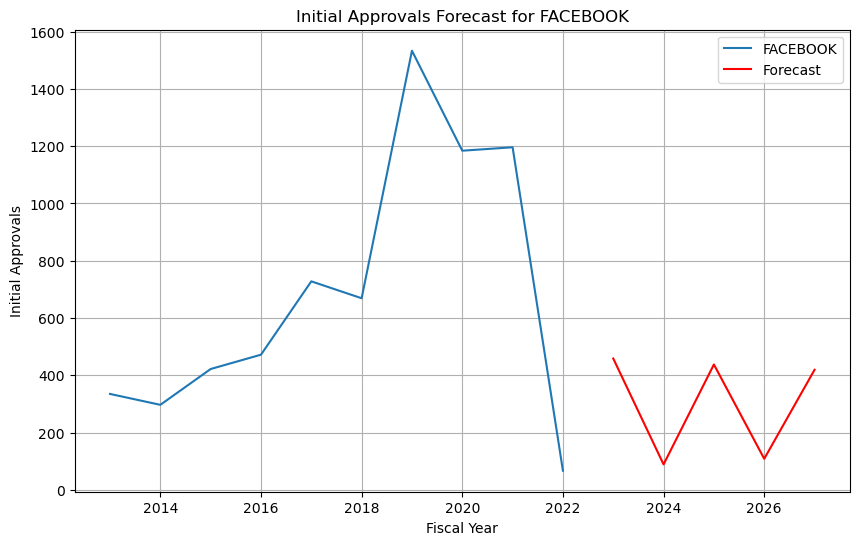

    Fiscal Year  Initial Approval Forecast
10         2023                 458.643154
11         2024                  89.064462
12         2025                 437.821764
13         2026                 108.712813
14         2027                 419.280366


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


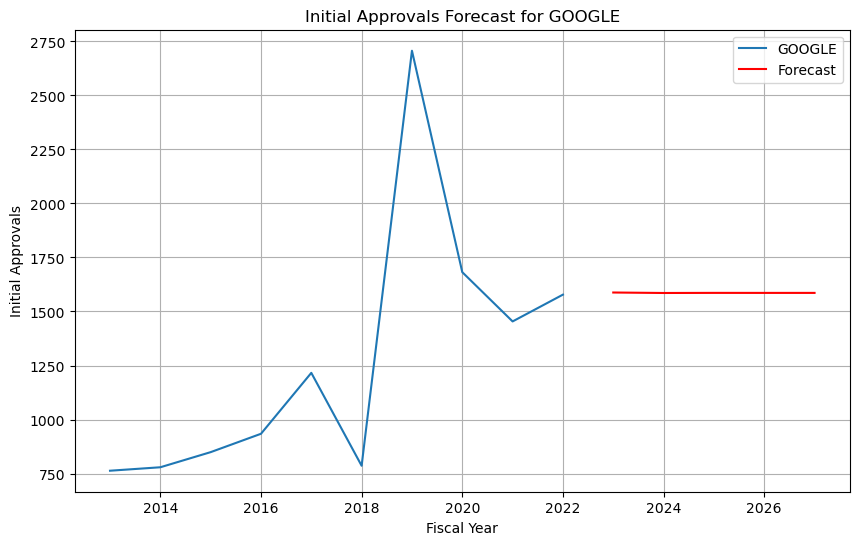

    Fiscal Year  Initial Approval Forecast
10         2023                1587.881230
11         2024                1585.660015
12         2025                1586.159325
13         2026                1586.047084
14         2027                1586.072315


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


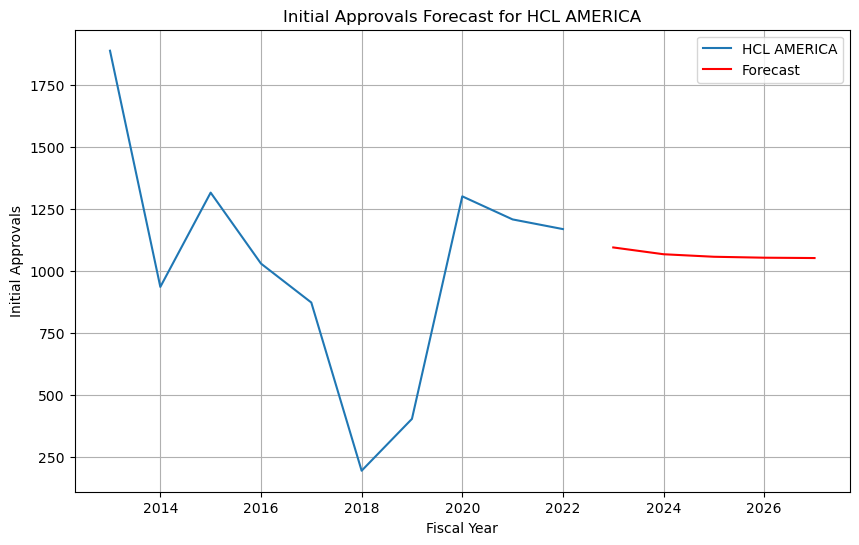

    Fiscal Year  Initial Approval Forecast
10         2023                1096.023129
11         2024                1068.609463
12         2025                1058.450760
13         2026                1054.686241
14         2027                1053.291221


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


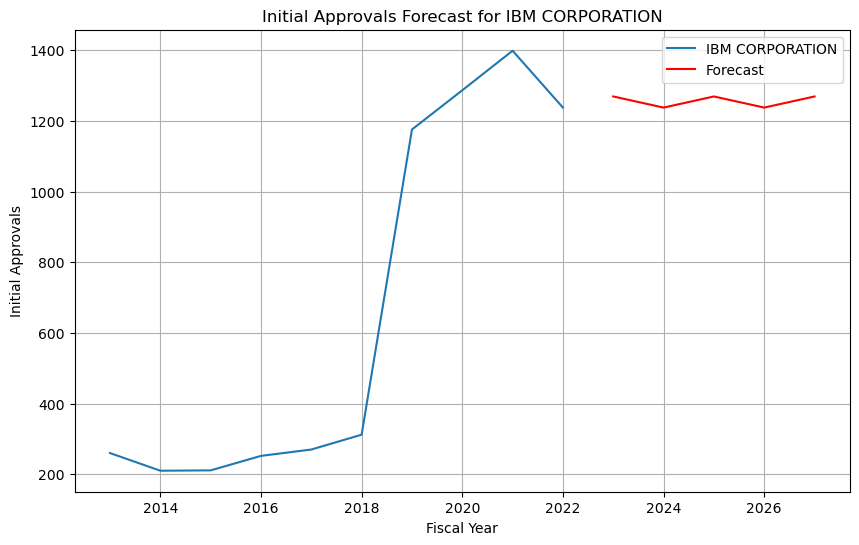

    Fiscal Year  Initial Approval Forecast
10         2023                1269.525119
11         2024                1238.013548
12         2025                1269.511577
13         2026                1238.027085
14         2027                1269.498046


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


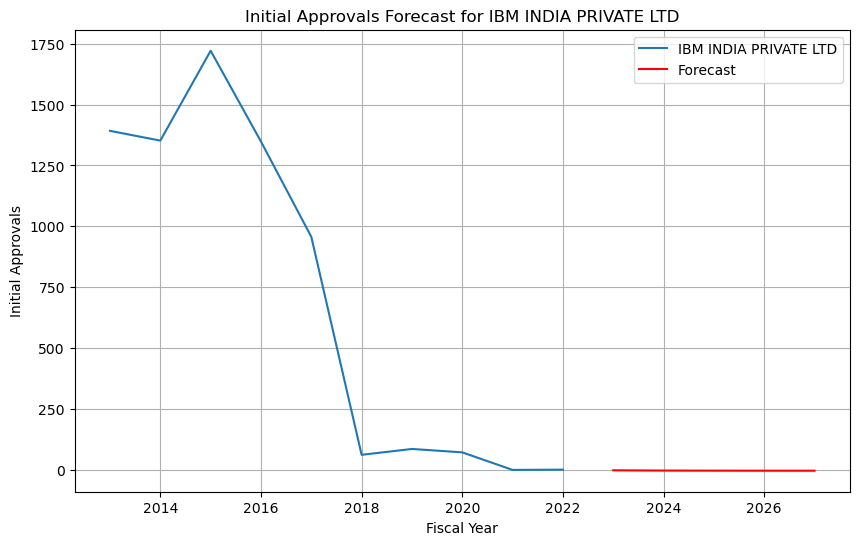

    Fiscal Year  Initial Approval Forecast
10         2023                  -1.668439
11         2024                  -2.708326
12         2025                  -3.113568
13         2026                  -3.271490
14         2027                  -3.333033


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


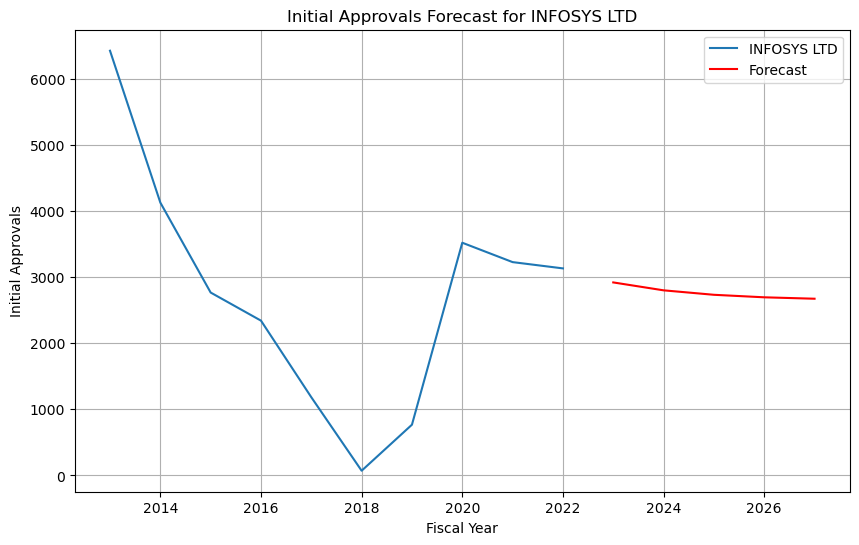

    Fiscal Year  Initial Approval Forecast
10         2023                2917.899454
11         2024                2798.314584
12         2025                2730.891179
13         2026                2692.877043
14         2027                2671.444210


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


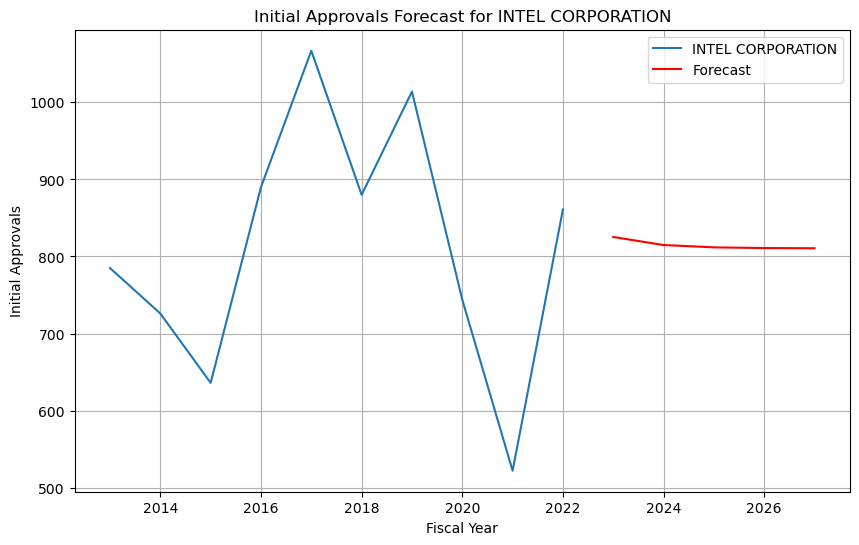

    Fiscal Year  Initial Approval Forecast
10         2023                 825.297682
11         2024                 814.871721
12         2025                 811.827082
13         2026                 810.937973
14         2027                 810.678330


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


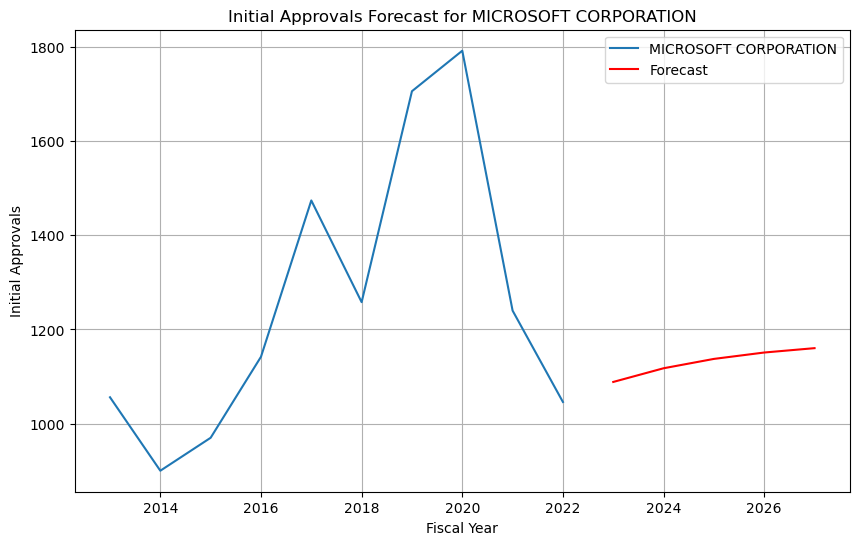

    Fiscal Year  Initial Approval Forecast
10         2023                1088.546812
11         2024                1117.614625
12         2025                1137.473638
13         2026                1151.041236
14         2027                1160.310565


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


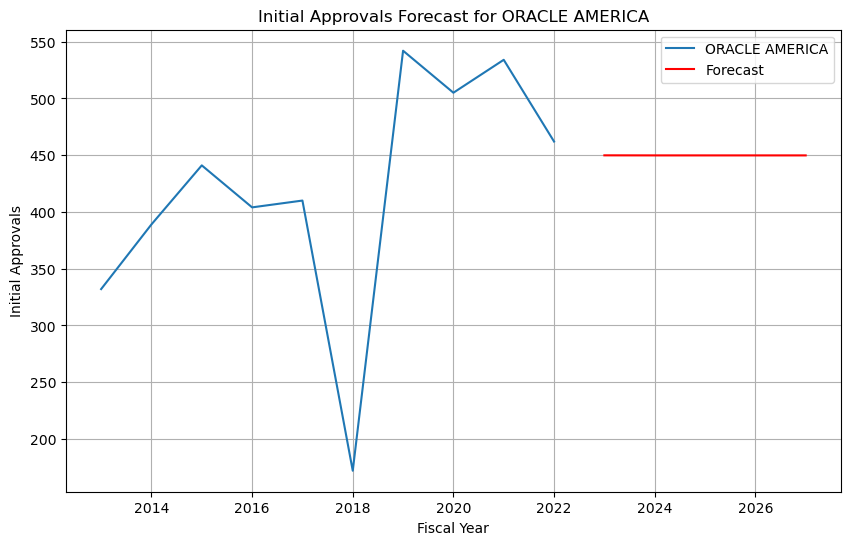

    Fiscal Year  Initial Approval Forecast
10         2023                 449.843658
11         2024                 449.784811
12         2025                 449.784526
13         2026                 449.784525
14         2027                 449.784525


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


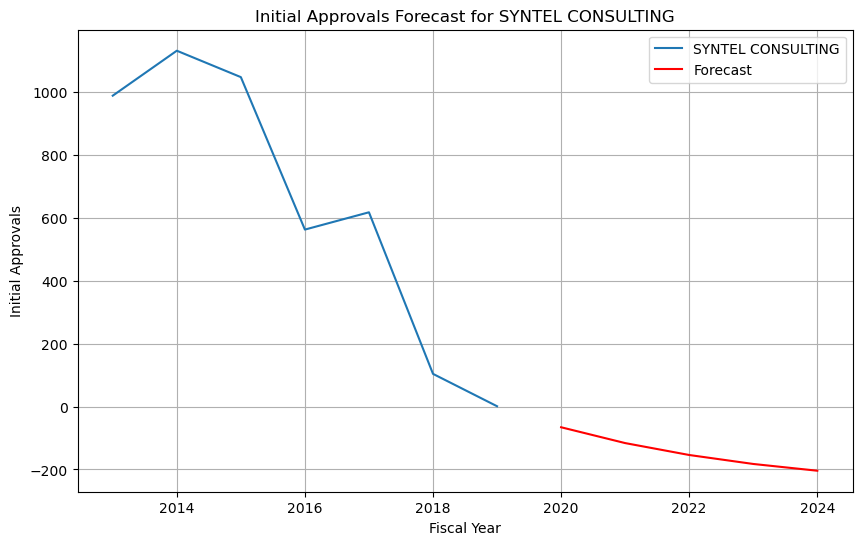

    Fiscal Year  Initial Approval Forecast
7          2020                 -65.851237
8          2021                -116.188095
9          2022                -154.090150
10         2023                -182.629194
11         2024                -204.118187


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


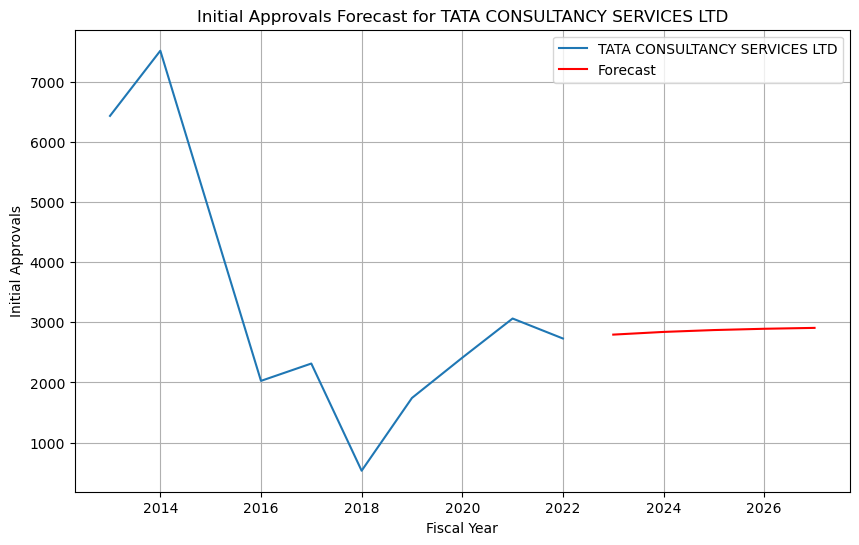

    Fiscal Year  Initial Approval Forecast
10         2023                2794.700730
11         2024                2839.431685
12         2025                2870.356504
13         2026                2891.736427
14         2027                2906.517472


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


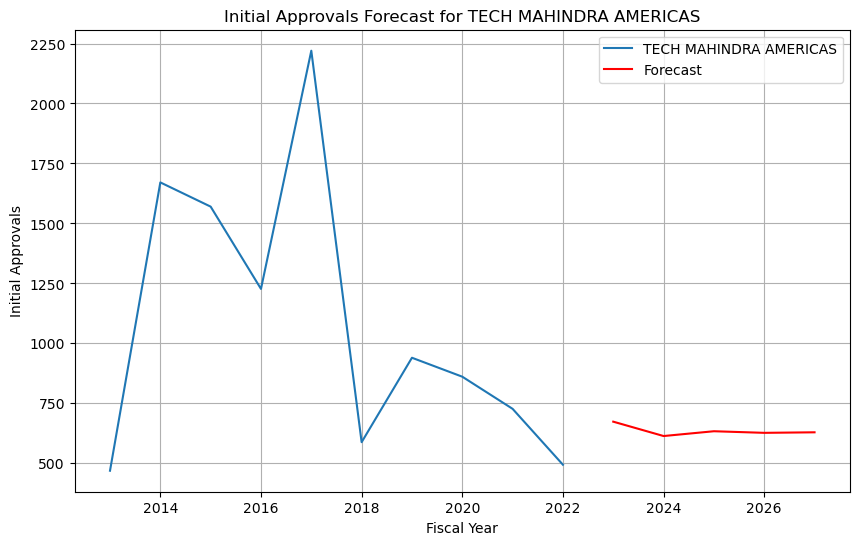

    Fiscal Year  Initial Approval Forecast
10         2023                 673.511684
11         2024                 613.630684
12         2025                 633.605619
13         2026                 626.942437
14         2027                 629.165122


C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\supri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


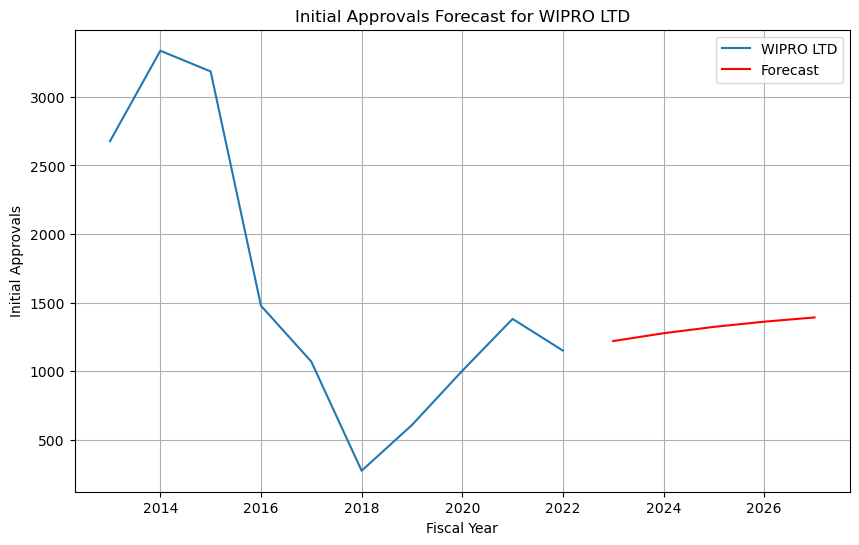

    Fiscal Year  Initial Approval Forecast
10         2023                1220.710425
11         2024                1277.592560
12         2025                1324.007100
13         2026                1361.880318
14         2027                1392.784010


In [37]:
for company_name, data in data_TS.groupby('Employer (Petitioner) Name'):
    if data['Fiscal Year'].count() >= 3:
        data.set_index('Fiscal Year', inplace=True)

        # ARIMA model (p, d, q) parameters
        p, d, q = 1, 1, 1

        # Fit ARIMA model
        model = ARIMA(data['Initial Approval'], order=(p, d, q))
        model_fit = model.fit()

        # Forecast for the next n years
        n = 5
        forecast = model_fit.get_forecast(steps=n)

        forecast_years = np.arange(data.index[-1] + 1, data.index[-1] + n + 1)

        # Visualize the original data and forecast
        plt.figure(figsize=(10, 6))
        plt.plot(data.index, data['Initial Approval'], label=company_name)
        plt.plot(forecast_years, forecast.predicted_mean, label='Forecast', color='red')
        plt.xlabel('Fiscal Year')
        plt.ylabel('Initial Approvals')
        plt.title(f'Initial Approvals Forecast for {company_name}')
        plt.legend()
        plt.grid(True)
        plt.show()

        # forecasted values
        forecast_df = pd.DataFrame({'Fiscal Year': forecast_years, 'Initial Approval Forecast': forecast.predicted_mean})
        print(forecast_df)